In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드
file_path = "D:/01-STUDY/3차 팀PJ/electric_ai_data.csv"
data = pd.read_csv(file_path, encoding="utf-8-sig")

In [5]:
# 데이터 전처리: 필요한 칼럼만 사용
data = data[["region_province", "cause_category", "cause_subcategory", "total_incidents", "total_damage"]]

In [6]:
# 데이터 타입 변환
data["total_incidents"] = pd.to_numeric(data["total_incidents"], errors="coerce")
data["total_damage"] = pd.to_numeric(data["total_damage"], errors="coerce")

In [7]:
# 지역별 전기적 세부 요인 데이터 집계
region_cause_summary = data.groupby(["region_province", "cause_subcategory"])[
    ["total_incidents", "total_damage"]
].sum().reset_index()

In [8]:
# 지역별 위험 점수 계산
region_summary = data.groupby("region_province")[
    ["total_incidents", "total_damage"]
].sum().reset_index()

In [9]:
# 위험 점수 계산
region_summary["risk_score"] = (
    0.7 * region_summary["total_incidents"] + 0.3 * region_summary["total_damage"]
)

In [10]:
# 위험 점수 기준 내림차순 정렬
region_summary = region_summary.sort_values(by="risk_score", ascending=False)

In [11]:
# 위험 레벨 할당
percentile_80 = region_summary["risk_score"].quantile(0.8)
percentile_50 = region_summary["risk_score"].quantile(0.5)
region_summary["risk_level"] = region_summary["risk_score"].apply(
    lambda x: 3 if x >= percentile_80 else (2 if x >= percentile_50 else 1)
)

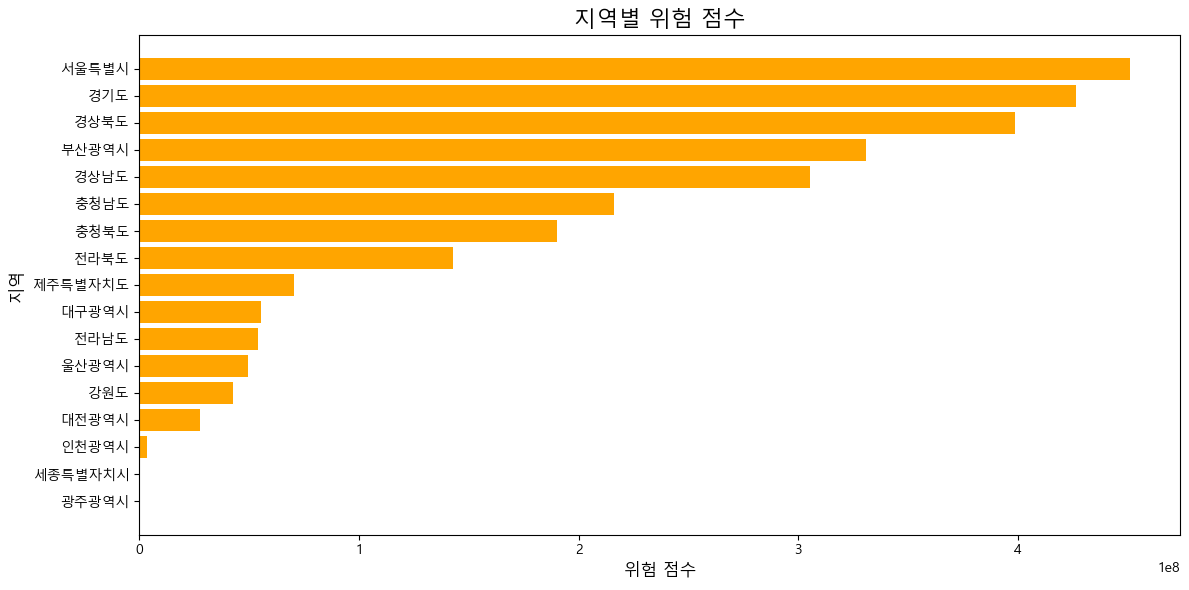

In [16]:
# 시각화: 지역별 위험 점수
plt.figure(figsize=(12, 6))
plt.barh(region_summary["region_province"], region_summary["risk_score"], color="orange")
plt.xlabel("위험 점수", fontsize=12)
plt.ylabel("지역", fontsize=12)
plt.title("지역별 위험 점수", fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [17]:
# 특정 지역(예: 서울특별시)의 세부 요인별 분석
specific_region = "서울특별시"
specific_region_data = region_cause_summary[region_cause_summary["region_province"] == specific_region]

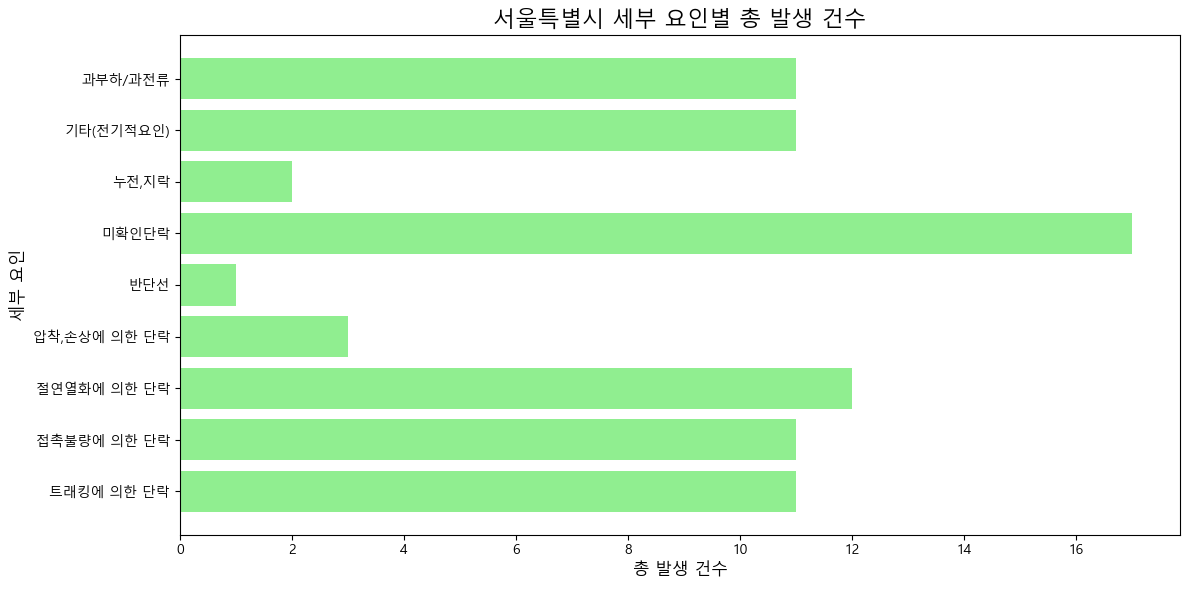

In [18]:

# 시각화: 특정 지역의 세부 요인별 총 발생 건수
plt.figure(figsize=(12, 6))
plt.barh(specific_region_data["cause_subcategory"], specific_region_data["total_incidents"], color="lightgreen")
plt.xlabel("총 발생 건수", fontsize=12)
plt.ylabel("세부 요인", fontsize=12)
plt.title(f"{specific_region} 세부 요인별 총 발생 건수", fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

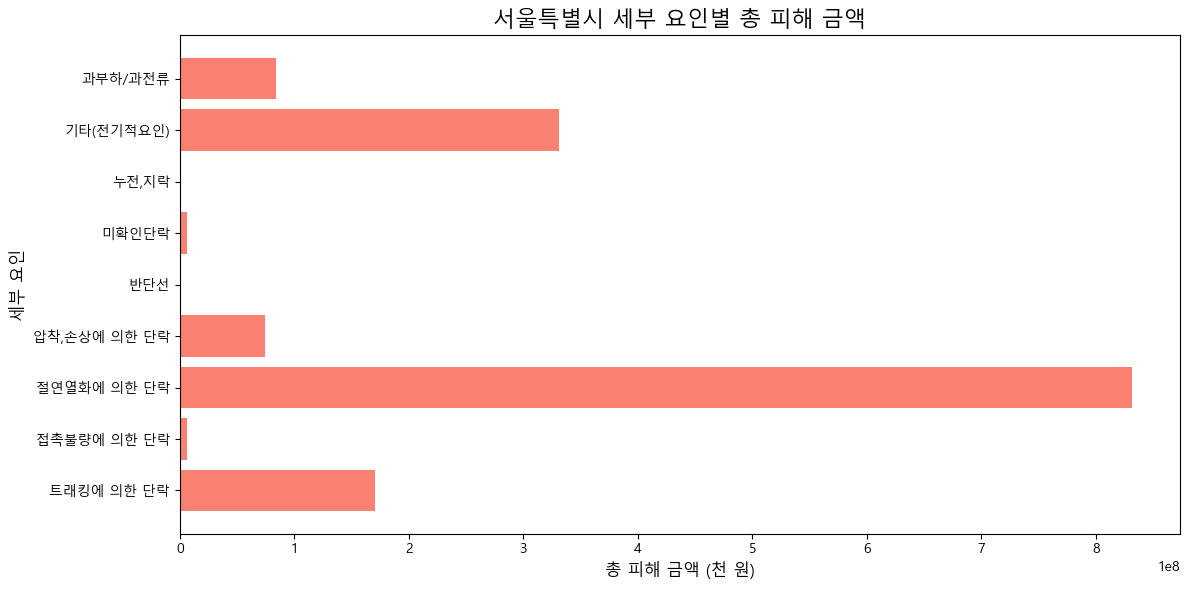

In [19]:
# 시각화: 특정 지역의 세부 요인별 총 피해 금액
plt.figure(figsize=(12, 6))
plt.barh(specific_region_data["cause_subcategory"], specific_region_data["total_damage"], color="salmon")
plt.xlabel("총 피해 금액 (천 원)", fontsize=12)
plt.ylabel("세부 요인", fontsize=12)
plt.title(f"{specific_region} 세부 요인별 총 피해 금액", fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

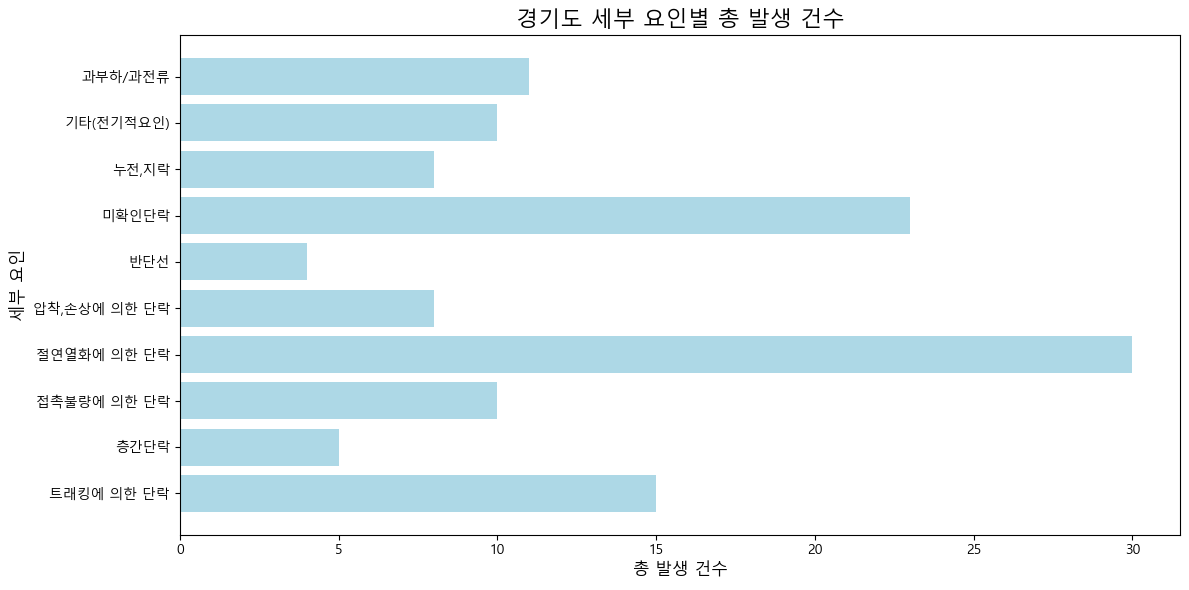

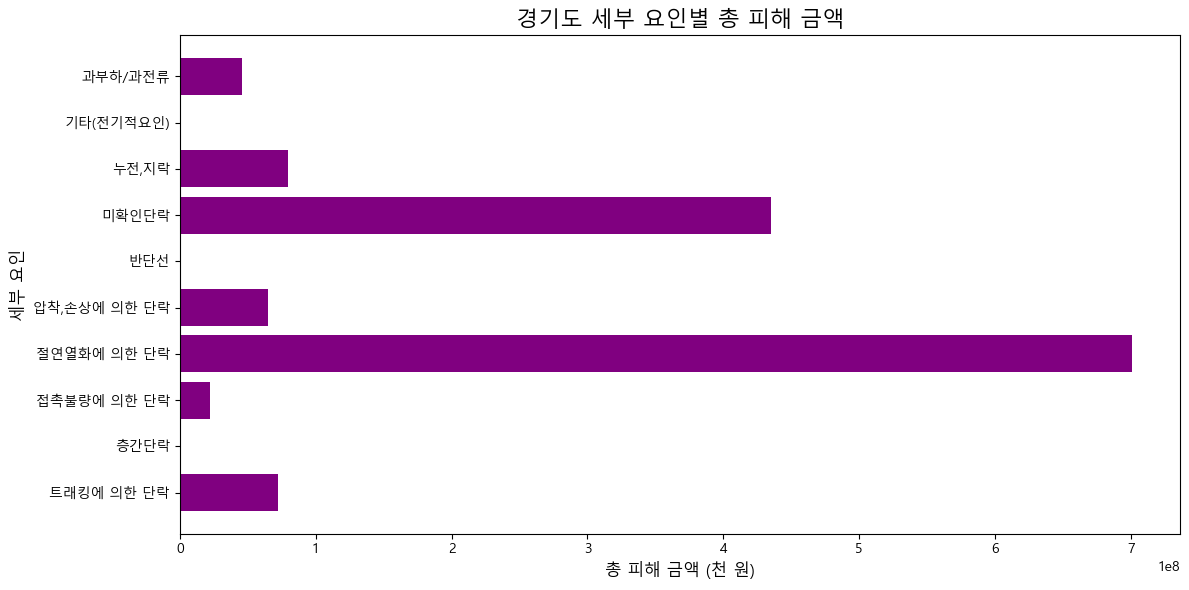

경기도 분석 및 시각화 완료!


In [11]:
# 특정 지역(예: 경기도)의 세부 요인별 분석
specific_region = "경기도"
specific_region_data = region_cause_summary[region_cause_summary["region_province"] == specific_region]

# 시각화: 경기도 세부 요인별 총 발생 건수
plt.figure(figsize=(12, 6))
plt.barh(specific_region_data["cause_subcategory"], specific_region_data["total_incidents"], color="lightblue")
plt.xlabel("총 발생 건수", fontsize=12)
plt.ylabel("세부 요인", fontsize=12)
plt.title(f"{specific_region} 세부 요인별 총 발생 건수", fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 시각화: 경기도 세부 요인별 총 피해 금액
plt.figure(figsize=(12, 6))
plt.barh(specific_region_data["cause_subcategory"], specific_region_data["total_damage"], color="purple")
plt.xlabel("총 피해 금액 (천 원)", fontsize=12)
plt.ylabel("세부 요인", fontsize=12)
plt.title(f"{specific_region} 세부 요인별 총 피해 금액", fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"{specific_region} 분석 및 시각화 완료!")
